<a href="https://colab.research.google.com/github/beltagy97/MRNet/blob/master/MRNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from numpy import moveaxis
from numpy import asarray
import pandas as pd
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [0]:
def extractThree(x):
  mid = len(x) // 2
  
  return np.array([ x[mid-1] , x[mid] ,x[mid+1]])
  

In [0]:
def getTrainingData(type1,type2):

  list = []

  for filename in sorted(os.listdir("/content/drive/My Drive/MRNet-v1.0/"+type1+"/"+type2)):
    if(filename != ".DS_Store"):
      trainingExample = np.load("/content/drive/My Drive/MRNet-v1.0/"+type1+"/"+type2+"/" + filename)
      x = image.img_to_array(trainingExample)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input(x)

      list.append(extractThree(trainingExample))

  return list.copy()
    
    
sagittalTrainingData = getTrainingData("train","sagittal")
axialTrainingData = getTrainingData("train","axial")
coronalTrainingData = getTrainingData("train","coronal")

sagittalTestData = getTrainingData("valid","sagittal")
axialTestData = getTrainingData("valid","axial")
coronalTestData = getTrainingData("valid","coronal")


In [0]:
def reshape_data(trainingData):
  data = asarray(trainingData)
  data = moveaxis(data, 1, 3)
  print(data.shape)

  return data
  


In [0]:
sagittalData  = reshape_data(sagittalTrainingData)
axialData = reshape_data(axialTrainingData)
coronalData = reshape_data(coronalTrainingData)

sagittalTestData = reshape_data(sagittalTestData)
axialTestData = reshape_data(axialTestData)
coronalTestData = reshape_data(coronalTestData)


(1130, 3, 256, 256)
(1130, 3, 256, 256)
(1130, 3, 256, 256)
(120, 3, 256, 256)
(120, 3, 256, 256)
(120, 3, 256, 256)


In [0]:
def readLabels(type1,type2):
  path = "/content/drive/My Drive/MRNet-v1.0/"+type1+"-"+type2 + ".csv"
  df=pd.read_csv(path, sep=',',header=None)
  labelsValid = df.values
  labelsValid = labelsValid[:,1]
  return labelsValid


In [0]:
abnormalLabels = readLabels('train','abnormal')
aclLabels = readLabels('train','acl')
meniscusLabels = readLabels('train','meniscus')


abnornmalTestLabels = readLabels('valid','abnormal')
aclTestLabels = readLabels('valid','acl')
meniscusTestLabels = readLabels('valid','meniscus')

In [0]:
from keras import models
from keras import layers
from keras.models import Model
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.applications import VGG16

def buildModel():
  vgg = VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(256,256,3), pooling=None)

  for layer in vgg.layers:
    layer.trainable = False

  x = vgg.output
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dropout(0.6)(x)
  predictions = layers.Dense(1, activation= 'sigmoid')(x)
  model = Model(inputs = vgg.input, outputs = predictions)

  model.summary()

  model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
  return model



In [0]:
model_abnormal_sagittal = buildModel()
history_abnormal_sagittal = model_abnormal_sagittal.fit(sagittalData,abnormalLabels,epochs=60,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

model_abnormal_axial = buildModel()
history_abnormal_axial = model_abnormal_axial.fit(axialData,abnormalLabels,epochs=60,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

model_abnormal_coronal = buildModel()
history_abnormal_coronal = model_abnormal_coronal.fit(coronalData,abnormalLabels,epochs=60,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [0]:
model_acl_sagittal = buildModel()
history_acl_sagittal = model_acl_sagittal.fit(sagittalData,aclLabels,epochs=60,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

model_acl_axial = buildModel()
history_acl_axial = model_acl_axial.fit(axialData,aclLabels,epochs=60,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

model_acl_coronal = buildModel()
history_acl_coronal = model_acl_coronal.fit(coronalData,aclLabels,epochs=60,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [0]:
model_meniscus_sagittal = buildModel()
history_meniscus_sagittal = model_meniscus_sagittal.fit(sagittalData,meniscusLabels,epochs=30,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

model_meniscus_axial = buildModel()
history_meniscus_axial = model_meniscus_axial.fit(axialData,meniscusLabels,epochs=30,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

model_meniscus_coronal = buildModel()
history_meniscus_coronal = model_meniscus_coronal.fit(coronalData,meniscusLabels,epochs=30,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score 


def getEvaluationScore(labels,predictions):

  my_score = accuracy_score(labels, predictions)
  print("my score: ",my_score)


  fscore = f1_score(labels, predictions)
  
  print("fscore: ",fscore)
  
  return my_score
  

In [0]:
def predictLabels(data,model,threshold):
  labels = model.predict(data) 
  for i in labels:
    print(i)
    
  labels = list(map(lambda x: 0 if x<threshold else 1, labels))
  print(labels)
  return labels

In [0]:
predictions_abnormal_sagittal = predictLabels(sagittalTestData,model_abnormal_sagittal, 0.75)
print("---------------------------------------------------------------------------------")
predictions_abnormal_axial = predictLabels(axialTestData,model_abnormal_axial, 0.75)
print("---------------------------------------------------------------------------------")
predictions_abnormal_coronal = predictLabels(coronalTestData,model_abnormal_coronal, 0.75)

print("############################################")
predictions_acl_sagittal = predictLabels(sagittalTestData,model_acl_sagittal, 0.15)
print("---------------------------------------------------------------------------------")
predictions_acl_axial = predictLabels(axialTestData,model_acl_axial, 0.15)
print("---------------------------------------------------------------------------------")
predictions_acl_coronal = predictLabels(coronalTestData,model_acl_coronal, 0.15)

print("############################################")
predictions_meniscus_sagittal = predictLabels(sagittalTestData,model_meniscus_sagittal, 0.4)
print("---------------------------------------------------------------------------------")
predictions_meniscus_axial = predictLabels(axialTestData,model_meniscus_axial, 0.4)
print("---------------------------------------------------------------------------------")
predictions_meniscus_coronal = predictLabels(coronalTestData,model_meniscus_coronal, 0.4)

[0.25125128]
[0.6022315]
[0.49386582]
[0.10516569]
[0.61215526]
[0.66009027]
[0.5038893]
[0.86197966]
[0.2556386]
[0.35316962]
[0.8152016]
[0.40363005]
[0.8110829]
[0.33064482]
[0.6690859]
[0.8806336]
[0.38950014]
[0.4751126]
[0.6191094]
[0.34321147]
[0.5955429]
[0.6565105]
[0.30956188]
[0.23218665]
[0.63917387]
[0.79198503]
[0.63096535]
[0.64472187]
[0.870383]
[0.5296811]
[0.93099636]
[0.38548842]
[0.9717876]
[0.8156681]
[0.1354582]
[0.69188]
[0.9330442]
[0.8718343]
[0.3031231]
[0.88248885]
[0.6972842]
[0.9505507]
[0.8909142]
[0.8723043]
[0.814577]
[0.8692962]
[0.9168949]
[0.8884839]
[0.97233325]
[0.94722843]
[0.9484494]
[0.7460946]
[0.9363649]
[0.99340177]
[0.9268541]
[0.89568865]
[0.9013454]
[0.9891008]
[0.96859574]
[0.9509921]
[0.919489]
[0.85577774]
[0.7039417]
[0.88250554]
[0.90243936]
[0.84579664]
[0.985609]
[0.5641817]
[0.5977829]
[0.7902832]
[0.42699954]
[0.70351386]
[0.68700063]
[0.9567197]
[0.9711722]
[0.64934856]
[0.9308053]
[0.9435331]
[0.42166877]
[0.8439454]
[0.8927876]


In [0]:
def ensemble(predictions1,predictions2,predictions3):
  list=[]
  for i in range(0,len(predictions1),1):
    total = sum([predictions1[i],predictions2[i],predictions3[i]])
    if total > 1:
      list.append(1)
    else:
      list.append(0)
      
  return list.copy()

labels_abnormal_ensemble = ensemble(predictions_abnormal_sagittal,predictions_abnormal_axial,predictions_abnormal_coronal)
print("labels_abnormal_ensemble: ",labels_abnormal_ensemble)
score_abnormal = getEvaluationScore(abnornmalTestLabels, labels_abnormal_ensemble)


labels_acl_ensemble = ensemble(predictions_acl_sagittal,predictions_acl_axial,predictions_acl_coronal)
print("labels_acl_ensemble: ",labels_acl_ensemble)
score_acl = getEvaluationScore(aclTestLabels, labels_acl_ensemble)



labels_meniscus_ensemble = ensemble(predictions_meniscus_sagittal,predictions_meniscus_axial,predictions_meniscus_coronal)
print("labels_meniscus_ensemble: ",labels_meniscus_ensemble)
score_meniscus = getEvaluationScore(meniscusTestLabels, labels_meniscus_ensemble)

    


labels_abnormal_ensemble:  [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
my score:  0.8416666666666667
fscore:  0.9015544041450776
labels_acl_ensemble:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
my score:  0.6666666666666666
fscore:  0.48717948717948717
labels_meniscus_ensemble:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

In [0]:
# score1 = getEvaluationScore(abnornmalTestLabels, predictions_abnormal_sagittal)
# score2 = getEvaluationScore(abnornmalTestLabels, predictions_abnormal_axial)
# score3 = getEvaluationScore(abnornmalTestLabels, predictions_abnormal_coronal)


In [0]:
def plot_accuracy(history):  
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.grid(True)

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.grid(True)
  plt.show()

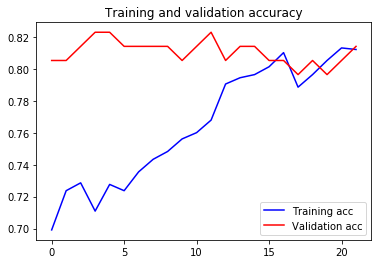

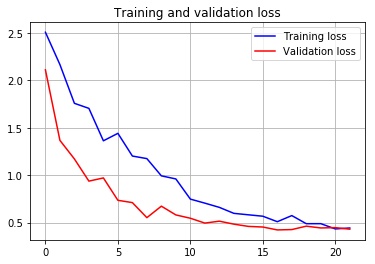

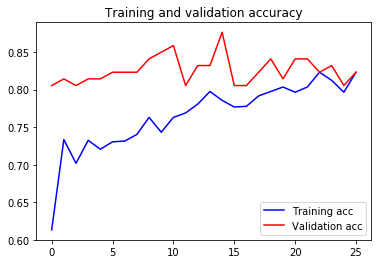

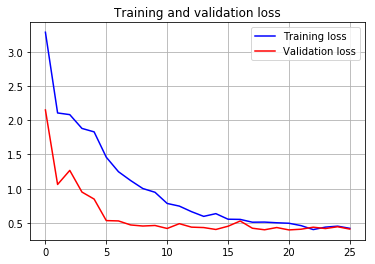

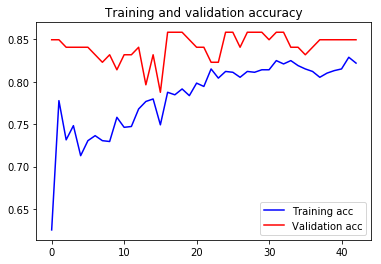

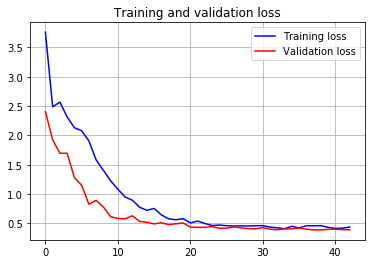

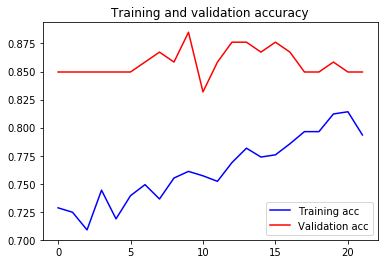

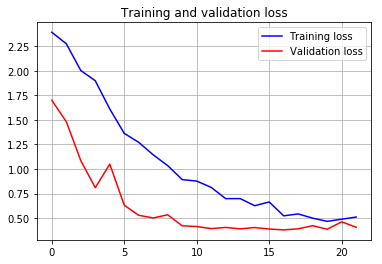

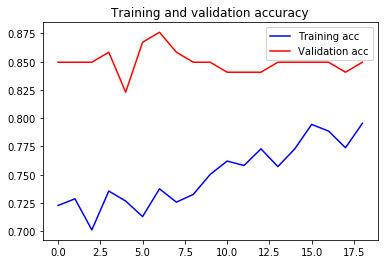

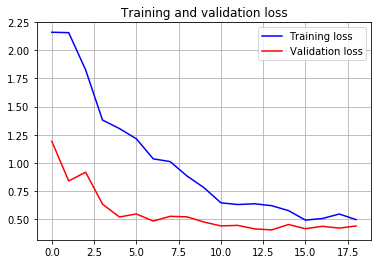

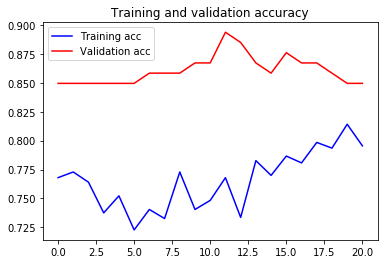

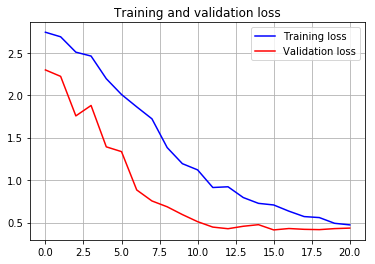

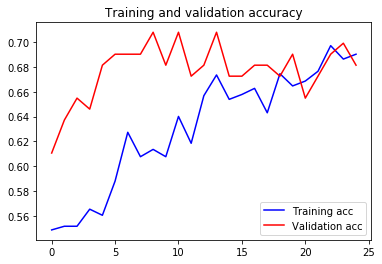

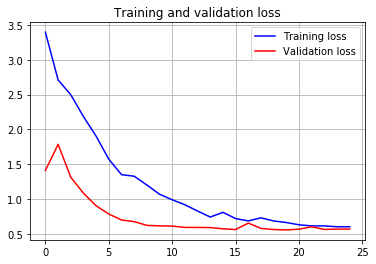

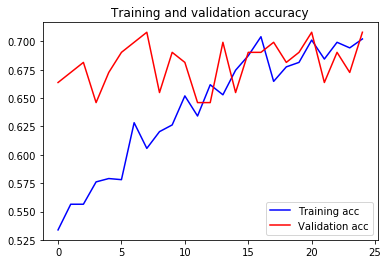

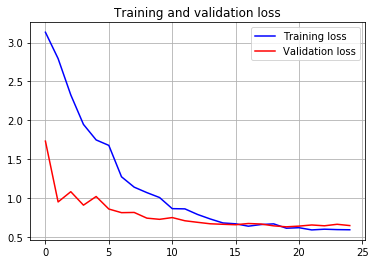

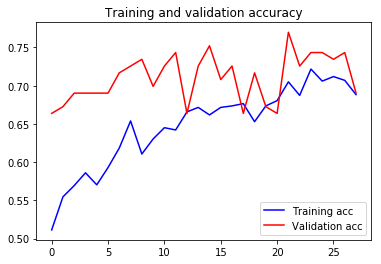

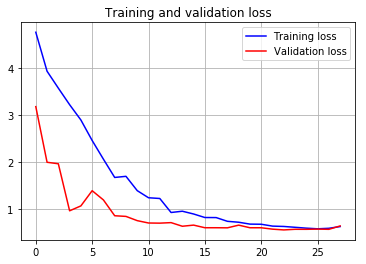

In [0]:

plot_accuracy(history_abnormal_sagittal)
plot_accuracy(history_abnormal_coronal)
plot_accuracy(history_abnormal_axial)

plot_accuracy(history_acl_sagittal)
plot_accuracy(history_acl_coronal)
plot_accuracy(history_acl_axial)

plot_accuracy(history_meniscus_sagittal)
plot_accuracy(history_meniscus_coronal)
plot_accuracy(history_meniscus_axial)
